In [5]:
# check whether we connected to GPU or not
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [6]:
!ls

datalab


In [9]:
!wget http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
!ls
!uncompress BSR_bsds500.tgz
!tar -xvf BSR_bsds500.tar
#!rm BSR_bsds500.tar
!ls

--2018-05-17 11:32:42--  http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Resolving www.eecs.berkeley.edu (www.eecs.berkeley.edu)... 23.185.0.1, 2620:12a:8001::1, 2620:12a:8000::1
Connecting to www.eecs.berkeley.edu (www.eecs.berkeley.edu)|23.185.0.1|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz [following]
--2018-05-17 11:32:42--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Resolving www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)... 128.32.244.183
Connecting to www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)|128.32.244.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70763455 (67M) [application/x-tar]
Saving to: ‘BSR_bsds500.tgz’

BSR_bsds500.tgz     100%[===================>]  67.48M  75.1MB/s    in 0.9s    

2018-05-17 11:32:43 (75.1 MB/s) - ‘B

BSR/BSDS500/data/images/train/42078.jpg
BSR/BSDS500/data/images/train/249087.jpg
BSR/BSDS500/data/images/train/90076.jpg
BSR/BSDS500/data/images/train/181079.jpg
BSR/BSDS500/data/images/train/56028.jpg
BSR/BSDS500/data/images/train/122048.jpg
BSR/BSDS500/data/images/train/164074.jpg
BSR/BSDS500/data/images/train/100075.jpg
BSR/BSDS500/data/images/train/188091.jpg
BSR/BSDS500/data/images/train/188005.jpg
BSR/BSDS500/data/images/train/24004.jpg
BSR/BSDS500/data/images/train/253036.jpg
BSR/BSDS500/data/images/train/181091.jpg
BSR/BSDS500/data/images/train/100098.jpg
BSR/BSDS500/data/images/train/227046.jpg
BSR/BSDS500/data/images/train/209070.jpg
BSR/BSDS500/data/images/train/156079.jpg
BSR/BSDS500/data/images/train/187029.jpg
BSR/BSDS500/data/images/train/187083.jpg
BSR/BSDS500/data/images/train/183055.jpg
BSR/BSDS500/data/images/train/173036.jpg
BSR/BSDS500/data/images/train/183087.jpg
BSR/BSDS500/data/images/train/138078.jpg
BSR/BSDS500/data/images/train/134052.jpg
BSR/BSDS500/data/ima

In [14]:
!ls

BSR  BSR_bsds500.tar  BSR_bsds500.tgz  BSR_bsds500.tgz.1  datalab  name.png


In [4]:
"""
import glob
'''
function to read all mat file names in a given folder
@param  path: given in this form '/path/'
'''
def mat_file_names_list(path):
    mat_files=glob.glob('.'+path+'*.mat')
    return mat_files
  
def jpg_file_names_list(path):
    mat_files=glob.glob('.'+path+'*.jpg')
    return mat_files
#testing that function actually works
mat_files=mat_file_names_list('BSR/BSDS500/data/groundTruth/train/')
print(len(mat_files))
print(mat_files)
"""

0
[]


In [0]:
'''
#made lists of names of files containing reviews
#tested
train_mat_names = mat_file_names_list('BSR/BSDS500/data/groundTruth/train/')
train_img_names = jpg_file_names_list('BSR/BSDS500/data/images/train/')
test_mat_names = mat_file_names_list('BSR/BSDS500/data/groundTruth/test/')
test_img_names = jpg_file_names_list('BSR/BSDS500/data/images/test/')
val_mat_names = mat_file_names_list('BSR/BSDS500/data/groundTruth/val/')
val_img_names = jpg_file_names_list('BSR/BSDS500/data/images/val/')
'''


In [0]:
'''
import matplotlib.image as img
################################## TEST ######################################
directory='BSR/BSDS500/data/images/train/97017.jpg'
#directory = direction + str(i) + ''
image = img.imread(directory).T

print(image.shape)
'''

In [15]:

import numpy as np
from os import listdir
from os.path import isfile, join

# get all the images files and boundary file
img_dir = "BSR/BSDS500/data/images/train/"
boundary_dir = "BSR/BSDS500/data/groundTruth/train/"
img_files = [f for f in listdir(img_dir) if isfile(join(img_dir, f)) and f.endswith(".jpg")]
boundary_files = [f for f in listdir(boundary_dir) if isfile(join(boundary_dir, f)) and f.endswith(".mat")]

num = len(boundary_files)

print("image files")
print(sorted(img_files))
print(len(img_files))
print("boundary files")
print(sorted(boundary_files))
print(len(boundary_files))

image files
['100075.jpg', '100080.jpg', '100098.jpg', '103041.jpg', '104022.jpg', '105019.jpg', '105053.jpg', '106020.jpg', '106025.jpg', '108041.jpg', '108073.jpg', '109034.jpg', '112082.jpg', '113009.jpg', '113016.jpg', '113044.jpg', '117054.jpg', '118020.jpg', '118035.jpg', '12003.jpg', '12074.jpg', '122048.jpg', '124084.jpg', '126039.jpg', '130034.jpg', '134008.jpg', '134052.jpg', '135037.jpg', '135069.jpg', '138032.jpg', '138078.jpg', '140055.jpg', '140075.jpg', '144067.jpg', '145014.jpg', '145053.jpg', '147021.jpg', '147062.jpg', '15004.jpg', '15088.jpg', '151087.jpg', '153077.jpg', '153093.jpg', '155060.jpg', '156079.jpg', '157036.jpg', '159029.jpg', '159045.jpg', '159091.jpg', '16052.jpg', '161062.jpg', '163014.jpg', '163062.jpg', '164074.jpg', '166081.jpg', '169012.jpg', '170054.jpg', '172032.jpg', '173036.jpg', '176019.jpg', '176035.jpg', '176039.jpg', '178054.jpg', '181018.jpg', '181079.jpg', '181091.jpg', '183055.jpg', '183087.jpg', '187003.jpg', '187029.jpg', '187039.jpg'

Getting data from mat files:

In [38]:
import scipy.io
import numpy as np


def get_groundTruth(path):
    """
    return the nparray of boundary (0 for boundary and 255 for area)
    :param path:
    :return:
    """
    mat = scipy.io.loadmat(path)
    groundTruth = mat.get('groundTruth')
    label_num = groundTruth.size
    #print(groundTruth.size)
    for i in range(label_num):
        boundary = groundTruth[0][i]['Boundaries'][0][0]
        if i == 0:
            trueBoundary = boundary
        else:
            trueBoundary += boundary

    height = trueBoundary.shape[0]
    width = trueBoundary.shape[1]
    trueBoundary = trueBoundary.reshape(height, width, 1)

    #trueBoundary = 255 * np.ones([height, width, 1], dtype="uint8") - (trueBoundary > 0) * 255 # what does this line do?
    

    return trueBoundary


get_groundTruth('BSR/BSDS500/data/groundTruth/train/2092.mat')


array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

In [0]:
def get_gg(path):
    """
    return the nparray of boundary (0 for boundary and 255 for area)
    :param path:
    :return:
    """
    mat = scipy.io.loadmat(path)
    groundTruth = mat.get('groundTruth')
    label_num = groundTruth.size
    #print(groundTruth.size)
    for i in range(label_num):
        boundary = groundTruth[0][i]['Boundaries'][0][0]
        if i == 0:
            trueBoundary = boundary
        else:
            trueBoundary += boundary

    height = trueBoundary.shape[0]
    width = trueBoundary.shape[1]
    trueBoundary = trueBoundary.reshape(height, width, 1)

    trueBoundary = 255 * np.ones([height, width, 1], dtype="uint8") - (trueBoundary > 0) * 255 # what does this line do?
    

    return trueBoundary



In [17]:
import scipy.io
import numpy as np

mat = scipy.io.loadmat("BSR/BSDS500/data/groundTruth/train/2092.mat")

for x in mat.keys():
  print(x)
  


__header__
__version__
__globals__
groundTruth
(1, 7)


understanding data:

In [19]:
print(mat['groundTruth'])

[[array([[(array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [15, 15, 15, ..., 15, 15, 15],
       [15, 15, 15, ..., 15, 15, 15],
       [15, 15, 15, ..., 15, 15, 15]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))]],
      dtype=[('Segmentation', 'O'), ('Boundaries', 'O')])
  array([[(array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 

In [37]:
from PIL import Image
import numpy as np
import matplotlib
from google.colab import files

print("shape")
groundTruth = mat.get('groundTruth')
print(groundTruth.shape)
label_num = groundTruth.size
print(label_num)
for i in range(label_num):
  print(str(i))
  print(groundTruth[0][i].shape)
  print(groundTruth[0][i][0].shape)
  print(groundTruth[0][i][0][0].shape)
  print(groundTruth[0][i][0][0])
  print(groundTruth[0][i]['Boundaries'][0][0].shape)
  print(groundTruth[0][i]['Boundaries'][0][0])
  data=(groundTruth[0][i]['Boundaries'][0][0])
  matplotlib.image.imsave(str(i)+'name.png', data)
  files.download(str(i)+'name.png')

shape
(1, 7)
7
0
(1, 1)
(1,)
()
(array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [15, 15, 15, ..., 15, 15, 15],
       [15, 15, 15, ..., 15, 15, 15],
       [15, 15, 15, ..., 15, 15, 15]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))
(321, 481)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
1
(1, 1)
(1,)
()
(array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0

In [11]:
get_groundTruth('BSR/BSDS500/data/groundTruth/train/2092.mat').shape

(321, 481, 1)

In [10]:
# all_comb=[]
# for z in get_groundTruth('BSR/BSDS500/data/groundTruth/train/2092.mat'):
#   all_comb.append(z)
# print(len(all_comb))

print(get_groundTruth('BSR/BSDS500/data/groundTruth/train/2092.mat')[0][:][:][:])

(481, 1)


In [0]:
from PIL import Image
import numpy as np

import matplotlib



#w, h = 512, 512
data = get_groundTruth('BSR/BSDS500/data/groundTruth/train/388016.mat')[0][:][:][:]
#data[256, 256] = [255, 0, 0]
#img = Image.fromarray(data,'RGB')
#img.save('my.png')
matplotlib.image.imsave('name.png', data)

In [0]:
from google.colab import files
files.download('name.png')

In [0]:
'''
import scipy.io as sio

def return_matrix(names):
  matrix=[]
  for name in names:
    mat_contents = sio.loadmat(name+'.mat')
    matrix.append(mat_contents)
    
    
# Can find the the codes below useful?

'''

In [8]:
!ls -l

total 4
drwxr-xr-x 1 root root 4096 May 11 18:15 datalab


[[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


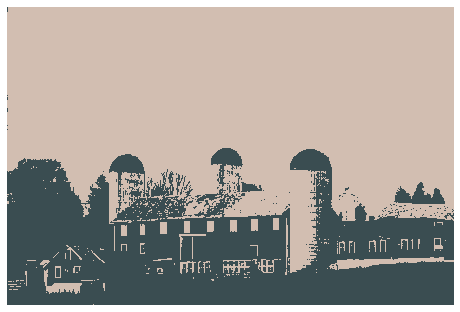

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


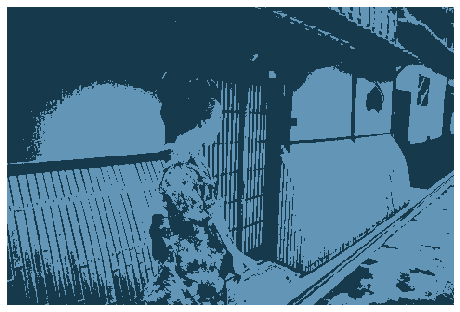

In [11]:
# from sklearn.neighbors import KNeighborsClassifier
# import matplotlib.image as img
# ################################## TEST ######################################
# directory='BSR/BSDS500/data/images/train/97017.jpg'
# #directory = direction + str(i) + ''
# image = img.imread(directory).T

from sklearn.metrics import f1_score



import numpy as np
from matplotlib import pyplot as plt

import cv2

imgs=[]

imgs.append(cv2.imread('BSR/BSDS500/data/images/train/97017.jpg'))
imgs.append(cv2.imread('BSR/BSDS500/data/images/train/145053.jpg'))

def images_to_seg(imgs,K):
#img = cv2.imread('BSR/BSDS500/data/images/train/97017.jpg')
  for img in imgs:
    Z = img.reshape((-1,3))

    # convert to np.float32
    Z = np.float32(Z)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    #K = 8
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    print(label)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))

    plt.imshow(res2)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()
    
images_to_seg(imgs,2)


